In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/digit_recognizer_train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40499,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


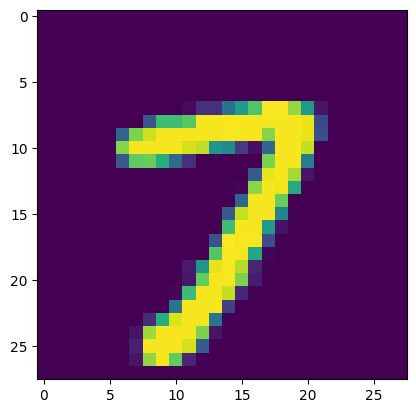

In [6]:
plt.imshow(df.iloc[10194, 1:].values.reshape(28,28))

### Model Building

In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [9]:
X_train.shape

(33600, 784)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [11]:
import time
start = time.time()

y_pred = knn.predict(X_test)

print(time.time() - start)

5.289507150650024


In [12]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,y_pred)

0.9648809523809524

#### PCA Code

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)

In [37]:
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [38]:
X_train_trf.shape

(33600, 100)

In [39]:
knn_trf = KNeighborsClassifier()
knn_trf.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [40]:
y_pred_trf = knn_trf.predict(X_test_trf)

In [41]:
accuracy_score(y_pred_trf,y_test)

0.9545238095238096

In [49]:
def run_pca(X_train_scaled,X_test_scaled,y_train,y_test):

    acc = []
    com = []

    for i in range(1, 30):
        
        pca = PCA(n_components=i)

        X_train_trf = pca.fit_transform(X_train_scaled)
        X_test_trf = pca.transform(X_test_scaled)

        knn_trf = KNeighborsClassifier()
        knn_trf.fit(X_train_trf,y_train)

        y_pred_trf = knn_trf.predict(X_test_trf)

        acc.append(accuracy_score(y_pred_trf,y_test))
        com.append(i)

    return acc, com

## Driver code
acc, com = run_pca(X_train_scaled,X_test_scaled,y_train,y_test)

[0.25821428571428573,
 0.32357142857142857,
 0.5107142857142857,
 0.6663095238095238,
 0.7377380952380952,
 0.8228571428571428,
 0.8439285714285715,
 0.8721428571428571,
 0.886547619047619,
 0.9054761904761904,
 0.9121428571428571,
 0.9184523809523809,
 0.9282142857142858,
 0.9346428571428571,
 0.9384523809523809,
 0.9377380952380953,
 0.9403571428571429,
 0.9411904761904762,
 0.9426190476190476,
 0.9441666666666667,
 0.9435714285714286,
 0.9436904761904762,
 0.9445238095238095,
 0.9452380952380952,
 0.9489285714285715,
 0.9480952380952381,
 0.9473809523809524,
 0.9483333333333334,
 0.9484523809523809]

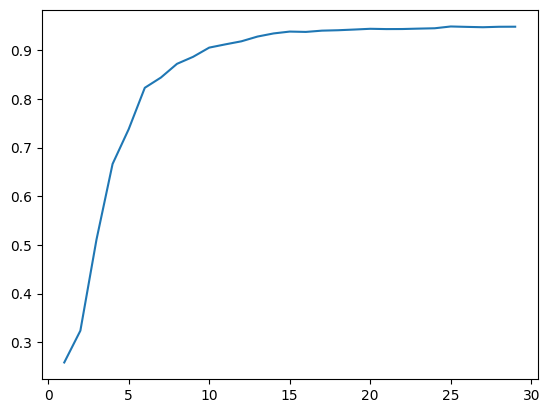

In [51]:
plt.plot(com,acc)
plt.show()